In [1]:
import pandas as pd
import pm4py

In [2]:
df = pd.read_csv("/Users/vakosta/Developer/IdeaProjects/process-mining_data/data/profiler.csv", sep=",")
df["CaseID"] = df["Event"].str.split(" #").str[1]
df["Event"] = df["Event"].str.split(" #").str[0]
df.head()

,Event,Time Range,Time (ms),Thread,Stack Trace,Detail,Level,CaseID
0,File.Open,3s 81ms - 3s 84ms,2,<unknown>,ClasspathCache.getPackageNameHash,"Path=""/Users/vakosta/Desktop/intellij-communit...",1,1
1,File.Read,3s 85ms - 3s 88ms,3,<unknown>,ClasspathCache.getPackageNameHash,"Bytes=1,024 — \nPath=""/Users/vakosta/Desktop/i...",1,1
2,File.Read,3s 89ms - 3s 89ms,0,<unknown>,ClasspathCache.getPackageNameHash,"Bytes=191 — \nPath=""/Users/vakosta/Desktop/int...",1,2
3,File.Close,3s 89ms - 3s 89ms,0,<unknown>,ClasspathCache.getPackageNameHash,"Path=""/Users/vakosta/Desktop/intellij-communit...",1,1
4,File.Open,3s 90ms - 3s 90ms,0,<unknown>,Xx3UnencodedString.hashUnencodedStringRange,"Path=""/Users/vakosta/Desktop/intellij-communit...",1,2


In [3]:
df = pm4py.format_dataframe(df, case_id="CaseID", activity_key="Event", timestamp_key="Time Range")
log = pm4py.convert_to_event_log(df[:])

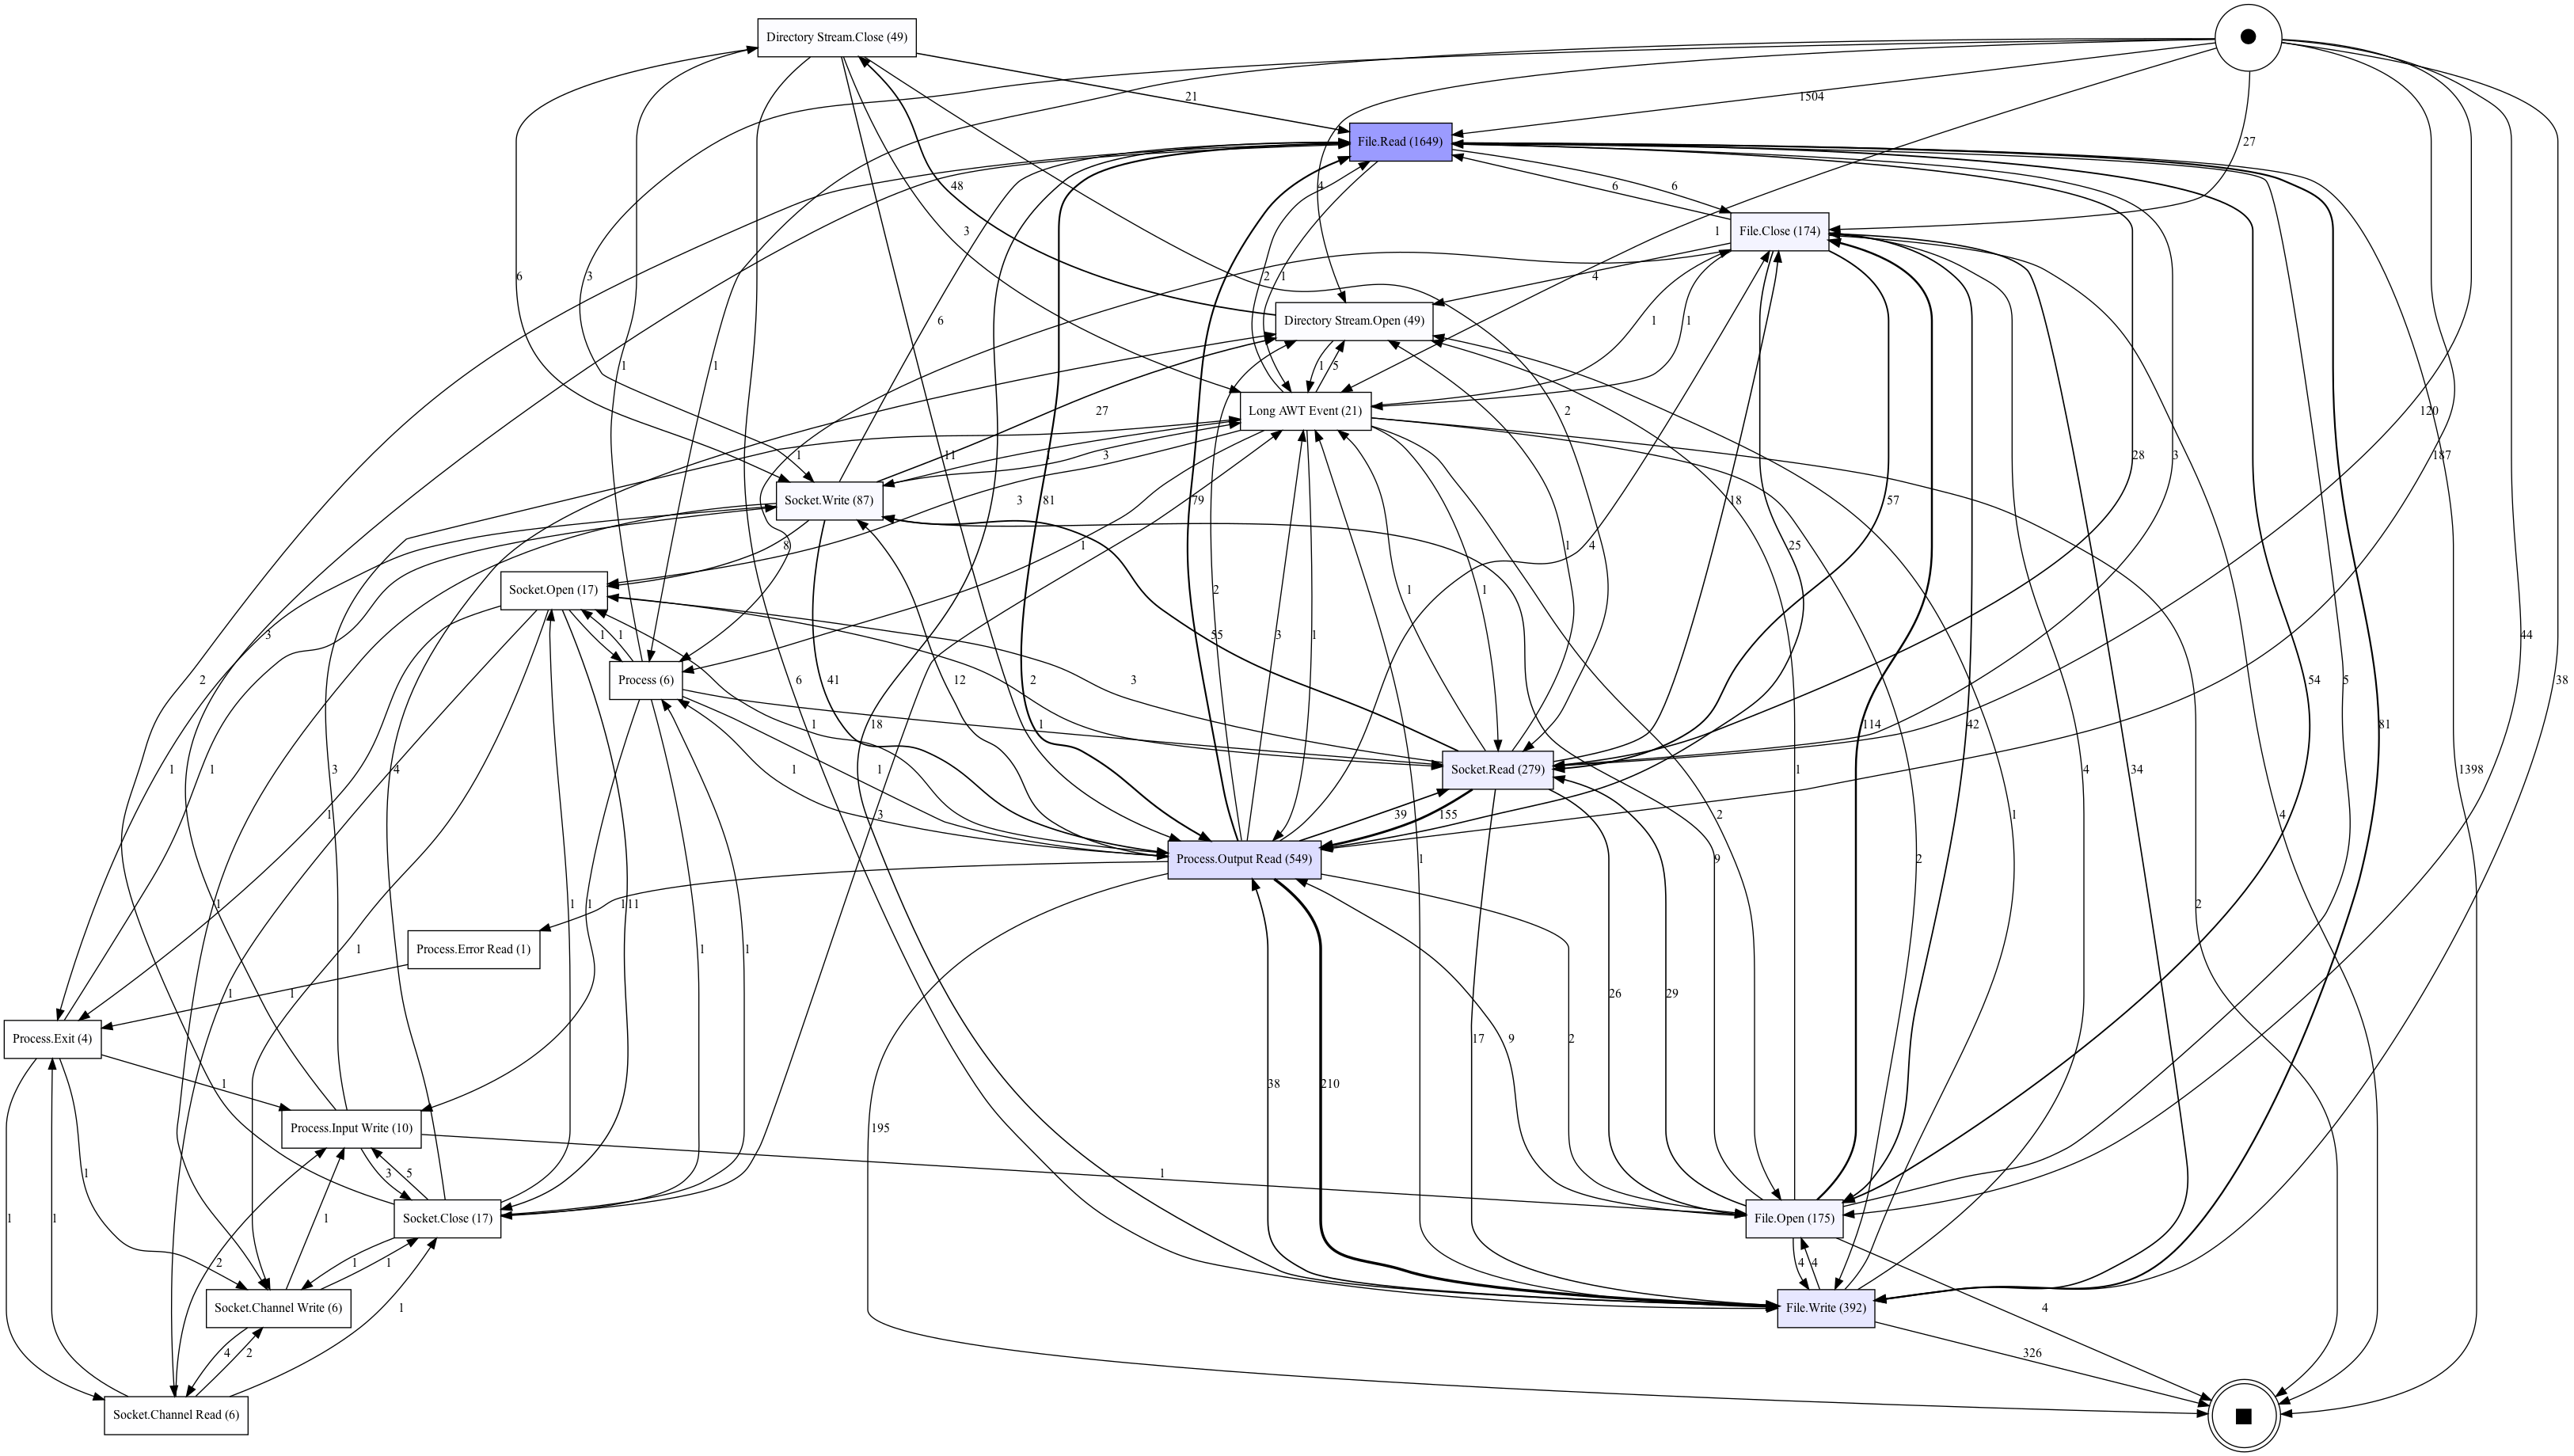

In [4]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log)
pm4py.view_dfg(dfg, start_activities, end_activities)